# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 
## Stephen Kuc
## 1/23/2023


This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# first, downloading nltk

# below is commented out code for this

# import nltk
# nltk.download()

In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

C:\Users\steph\miniconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
# Add any additional import statements you need here
import nltk
from nltk.tokenize import word_tokenize

In [4]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/steph/OneDrive/Documents/USD/ADS509/Mod2/"
data_location_mine = "/Users/steph/OneDrive/Documents/GitHub/ads509-api-scrape/"

# Going to utilize the sample data provided for this 

twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [5]:
# writing descriptive_stats fucntion below

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        This function will do the following:
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    

    # finding total number of tokens by the length of tokens list
    num_tokens = len(tokens)
    
    # creating a set of tokens to find unique, and then length of that
    num_unique_tokens = len(set(tokens))
    
    # dividing unique over total to find diversity
    lexical_diversity = num_unique_tokens / num_tokens
    
    
    # creating a quick for-loop to cound all characters in document
    num_characters_list = []
    for word in tokens:
        num_characters_list.append(len(word))
        
    num_characters = sum(num_characters_list)
    
    # utilizing Counter to count the characters and then finding the top 5
    
    common_count = Counter(tokens)
    
    most_common_five = common_count.most_common(5)
        
    
    if verbose == True:        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(f"These are the five most common tokens and their count:\n {most_common_five}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters, most_common_five])
    

In [6]:
text = """here is some example text with other example text here in this text""".split()



assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
These are the five most common tokens and their count:
 [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


### Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements in code essentially ensure that our code will run smoothly throughout the entire program, and when utilizing them when writing code to test the code, we can quickly debug. Aside from debugging and testing, it's a good way to document code during development too.|

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# reading in lyric data
# this for cher and Robyn data

lyric_path = data_location + lyrics_folder

lyric_dict_cr = {"artist": [], "song_name": [], "lyrics": []}

for artist_folder in os.listdir(lyric_path):
    artist_path = lyric_path + artist_folder
    for file in os.listdir(artist_path):
        if file.endswith(".txt"):
            file_path = f"{artist_path}/{file}"
            with open(file_path, 'r') as f:
                lyrics = f.read()
                song_name = file.split("_")[1].split(".")[0] # take just song title from file name
                
                # adding data to dictionary
                lyric_dict_cr['artist'].append(artist_folder)
                lyric_dict_cr['song_name'].append(song_name)
                lyric_dict_cr['lyrics'].append(lyrics)
        

In [8]:
# reading in lyric data
# this for Tom Petty and FT data

lyric_path_ft = data_location_mine + lyrics_folder

lyric_dict_ft = {"artist": [], "song_name": [], "lyrics": []}

for artist_folder in os.listdir(lyric_path_ft):
    artist_path = lyric_path_ft + artist_folder
    for file in os.listdir(artist_path):
        if file.endswith(".txt"):
            file_path = f"{artist_path}/{file}"
            with open(file_path, 'r') as f:
                lyrics = f.read()
                song_name = file.split("_")[1].split(".")[0] # take just song title from file name
                
                # adding data to dictionary
                lyric_dict_ft['artist'].append(artist_folder)
                lyric_dict_ft['song_name'].append(song_name)
                lyric_dict_ft['lyrics'].append(lyrics)

In [9]:
# reading in twitter data, just for cher and robyn


twit_path = data_location + twitter_folder

twit_dict_cr = {"artist": [], "description": []}

for file in os.listdir(twit_path):
    if file.endswith('_data.txt'):
        # saving artist name from folder name
        artist = file.split('_')[0]
        
        # saving follower_path
        file_path = twit_path + file
        with open(file_path, 'r', encoding = "utf8") as f:
            for line in f:
                fields = line.strip().split("\t")
                description = fields[-1] # description should be last field based on last assignment instrs.
    
                # adding data to dictionary
                twit_dict_cr['artist'].append(artist)
                twit_dict_cr['description'].append(description)
                    


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



#### Twitter Data

In [10]:
# splitting by artist

# below are my attempts at doing it within just a dictionary..

twit_cher = {"artist": [], "description": []}
twit_robyn = {"artist": [], "description": []}

for key, item in twit_dict_cr.items():
    if key == "artist" and item == "cher":
        twit_cher.append(twit_dict_cr.get("artist", "description"))
    elif key == "artist" and item == "robyn":
        twit_robyn['artist'].append(item)


twit_cher = {"artist": "cher" for (key, value) in twit_dict_cr.items() if twit_dict_cr["artist"] == "cher"}

In [11]:
# quick fix using dataframes and pandas

twit_cr_df = pd.DataFrame(twit_dict_cr)

twit_cher_df = twit_cr_df.loc[twit_cr_df['artist'] == 'cher']
twit_robyn_df = twit_cr_df.loc[twit_cr_df['artist'] == 'robynkonichiwa']


In [12]:
# continuing with it
twit_cher_df = twit_cher_df.astype(str)
twit_robyn_df = twit_robyn_df.astype(str)

twit_cher = twit_cher_df.to_dict()
twit_robyn = twit_robyn_df.to_dict()

dict_list = [twit_cher, twit_robyn]

# need to ensure dictionaries are all strings

for i in dict_list:
    i['description'] = str(i['description'])
            


In [13]:
twit_robyn['description'] = str(twit_robyn['description'])
twit_cher['description'] = str(twit_cher['description'])

Can't quite get it figured out with just the dictionary; so, utilizing the dataframe created

In [14]:
# splitting on white space
twit_cher_clean =  [txt.split(' ') for txt in twit_cher_df['description'].tolist()]
twit_robyn_clean =  [txt.split(' ') for txt in twit_robyn_df['description'].tolist()]

# that created a list of lists, need to flatten back to a 2-d list

twit_cher_clean1 = [i for sublist in twit_cher_clean for i in sublist]
twit_robyn_clean1 = [i for sublist in twit_robyn_clean for i in sublist]


In [15]:
# folding to lower_case

twit_cher_clean2 =  [txt.lower() for txt in twit_cher_clean1]

twit_robyn_clean2 =  [txt.lower() for txt in twit_robyn_clean1]

In [16]:
# setting up function to remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [t for t in tokens if t not in stop_words]

In [17]:
# implementing function

twit_cher_clean3 = remove_stop(twit_cher_clean2)
twit_robyn_clean3 = remove_stop(twit_robyn_clean2)

In [21]:
# using regular expression to filter punctuation

import re 
r = re.compile(r'[^\w\s]+')
               
twit_cher_clean_fin = [r.sub('', s) for s in  twit_cher_clean3] 
twit_robyn_clean_fin = [r.sub('', s) for s in  twit_robyn_clean3] 

In [19]:
# remove punctuation using translate and make trans

# within list comprehension for loop
# using punctuation from string on import

# twit_cher_clean = [txt.translate(txt.maketrans('', '', punctuation)) for txt in twit_cher_df['description']]
# twit_robyn_clean = [txt.translate(txt.maketrans('', '', punctuation)) for txt in twit_robyn_df['description']]



In [22]:
twit_cher_corpus = ' '.join(twit_cher_clean_fin)
twit_robyn_corpus = ' '.join(twit_robyn_clean_fin)

In [23]:


twit_cher_tokens =word_tokenize(twit_cher_corpus)
twit_robyn_tokens = word_tokenize(twit_robyn_corpus)


### Cleaning Lyric Data

#### Cher and Robyn Data

In [24]:
# splitting by artist using dataframes

lyric_df_cr = pd.DataFrame(lyric_dict_cr)

lyric_cher_df = lyric_df_cr.loc[lyric_df_cr['artist'] == 'cher']
lyric_robyn_df = lyric_df_cr.loc[lyric_df_cr['artist'] == 'robyn']

In [25]:
# getting rid of \n that are stuck in text

lyric_cher_clean =  [txt.replace('\n',' ') for txt in lyric_cher_df['lyrics']]
lyric_robyn_clean =  [txt.replace('\n',' ')  for txt in lyric_robyn_df['lyrics']]

# splitting on white space
lyric_cher_clean1 =  [txt.split(' ') for txt in lyric_cher_clean]
lyric_robyn_clean1 =  [txt.split(' ') for txt in lyric_robyn_clean]

# that created a list of lists, need to flatten back to a 2-d list

lyric_cher_clean1 = [i for sublist in lyric_cher_clean1 for i in sublist]
lyric_robyn_clean1 = [i for sublist in lyric_robyn_clean1 for i in sublist]

# folding to lower_case

lyric_cher_clean2 =  [txt.lower() for txt in lyric_cher_clean1]

lyric_robyn_clean2 =  [txt.lower() for txt in lyric_robyn_clean1]

# getting rid of blank entries
while "" in lyric_cher_clean2:
    lyric_cher_clean2.remove("")
    
    
while "" in lyric_robyn_clean2:
    lyric_robyn_clean2.remove("")
    
# remove stopwords

lyric_cher_clean3 = remove_stop(lyric_cher_clean2)
lyric_robyn_clean3 = remove_stop(lyric_robyn_clean2)

# removing punctuation 
# using r as set in twitter step

lyric_cher_clean_fin  = [r.sub('', s) for s in  lyric_cher_clean3] 
lyric_robyn_clean_fin = [r.sub('', s) for s in  lyric_robyn_clean3] 


# finalizing tokens

lyric_cher_corpus = ' '.join(lyric_cher_clean_fin)
lyric_robyn_corpus = ' '.join(lyric_robyn_clean_fin)

lyric_cher_tokens = word_tokenize(lyric_cher_corpus)
lyric_robyn_tokens = word_tokenize(lyric_robyn_corpus)

#### tom petty and frank turner

In [26]:
# splitting by artist using dataframes

lyric_df_ft = pd.DataFrame(lyric_dict_ft)

lyric_tp_df = lyric_df_ft.loc[lyric_df_ft['artist'] == 'tompetty']
lyric_ft_df = lyric_df_ft.loc[lyric_df_ft['artist'] == 'frankturner']

In [27]:
lyric_ft_df['lyrics']

0     "Frank Turner - A Decent Cup Of Tea Lyrics | A...
1     "Frank Turner - Back In The Day Lyrics | AZLyr...
2     "Frank Turner - Better Half Lyrics | AZLyrics....
3     "Frank Turner - Father's Day Lyrics | AZLyrics...
4     "Frank Turner - I Knew Prufrock Before He Got ...
5     "Frank Turner - Imperfect Tense Lyrics | AZLyr...
6     "Frank Turner - Love Ire & Song Lyrics | AZLyr...
7     "Frank Turner - Must Try Harder Lyrics | AZLyr...
8     "Frank Turner - My Kingdom For A Horse Lyrics ...
9     "Frank Turner - Once We Were Anarchists Lyrics...
10    "Frank Turner - Photosynthesis Lyrics | AZLyri...
11    "Frank Turner - Reasons Not To Be An Idiot Lyr...
12    "Frank Turner - Romantic Fatigue Lyrics | AZLy...
13    "Frank Turner - Substitute Lyrics | AZLyrics.c...
14    "Frank Turner - The Ballad Of Me And My Friend...
15    "Frank Turner - The Ladies Of London Town Lyri...
16    "Frank Turner - The Real Damage Lyrics | AZLyr...
17    "Frank Turner - To Take You Home Lyrics | 

In [28]:
# getting rid of \n that are stuck in text

lyric_tp_clean =  [txt.replace('\\n',' ')  for txt in lyric_tp_df['lyrics']]
lyric_ft_clean =  [txt.replace('\\n',' ')  for txt in lyric_ft_df['lyrics']]

In [29]:
# splitting on white space
lyric_tp_clean1 =  [txt.split(' ') for txt in lyric_tp_clean]
lyric_ft_clean1 =  [txt.split(' ') for txt in lyric_ft_clean]

# that created a list of lists, need to flatten back to a 2-d list

lyric_tp_clean1 = [i for sublist in lyric_tp_clean1 for i in sublist]
lyric_ft_clean1 = [i for sublist in lyric_ft_clean1 for i in sublist]

# folding to lower_case

lyric_tp_clean2 =  [txt.lower() for txt in lyric_tp_clean1]

lyric_ft_clean2 =  [txt.lower() for txt in lyric_ft_clean1]

# getting rid of blank entries
while "" in lyric_tp_clean2:
    lyric_tp_clean2.remove("")
    
    
while "" in lyric_ft_clean2:
    lyric_ft_clean2.remove("")
    
# putting in an apostrophe for u2019 in ft lyrics
    
lyric_ft_clean2 = [re.sub("u2019", "'", s) for s in lyric_ft_clean2]

# and a dash for u2013
lyric_ft_clean2 = [re.sub("u2013", "-", s) for s in lyric_ft_clean2]
    
# remove stopwords

lyric_tp_clean3 = remove_stop(lyric_tp_clean2)
lyric_ft_clean3 = remove_stop(lyric_ft_clean2)


# removing punctuation 
# using r as set in twitter step

lyric_tp_clean_fin  = [r.sub('', s) for s in  lyric_tp_clean3] 
lyric_ft_clean_fin = [r.sub('', s) for s in  lyric_ft_clean3] 


# finalizing tokens

lyric_tp_corpus = ' '.join(lyric_tp_clean_fin)
lyric_ft_corpus = ' '.join(lyric_ft_clean_fin)

lyric_tp_tokens = word_tokenize(lyric_tp_corpus)
lyric_ft_tokens = word_tokenize(lyric_ft_corpus)



# Descriptive Statistics

In [31]:
# calls to descriptive_stats here

# cher lyrics

descriptive_stats(lyric_cher_tokens)

There are 36201 tokens in the data.
There are 3779 unique tokens in the data.
There are 169727 characters in the data.
The lexical diversity is 0.104 in the data.
These are the five most common tokens and their count:
 [('love', 1004), ('im', 513), ('know', 486), ('got', 352), ('na', 351)]


[36201,
 3779,
 0.1043893815087981,
 169727,
 [('love', 1004), ('im', 513), ('know', 486), ('got', 352), ('na', 351)]]

In [32]:
# robyn lyrics

descriptive_stats(lyric_robyn_tokens)

There are 15477 tokens in the data.
There are 2214 unique tokens in the data.
There are 73109 characters in the data.
The lexical diversity is 0.143 in the data.
These are the five most common tokens and their count:
 [('know', 308), ('im', 299), ('got', 276), ('love', 275), ('like', 232)]


[15477,
 2214,
 0.1430509788718744,
 73109,
 [('know', 308), ('im', 299), ('got', 276), ('love', 275), ('like', 232)]]

In [33]:
# tom petty lyrics

descriptive_stats(lyric_tp_tokens)

There are 2055 tokens in the data.
There are 534 unique tokens in the data.
There are 9844 characters in the data.
The lexical diversity is 0.260 in the data.
These are the five most common tokens and their count:
 [('know', 80), ('need', 50), ('baby', 47), ('like', 43), ('yeah', 39)]


[2055,
 534,
 0.25985401459854013,
 9844,
 [('know', 80), ('need', 50), ('baby', 47), ('like', 43), ('yeah', 39)]]

In [34]:
# frank turner lyrics

descriptive_stats(lyric_ft_tokens)

There are 3110 tokens in the data.
There are 1253 unique tokens in the data.
There are 16010 characters in the data.
The lexical diversity is 0.403 in the data.
These are the five most common tokens and their count:
 [('im', 49), ('get', 47), ('never', 26), ('got', 25), ('well', 23)]


[3110,
 1253,
 0.4028938906752412,
 16010,
 [('im', 49), ('get', 47), ('never', 26), ('got', 25), ('well', 23)]]

In [35]:
# cher twitter descriptions

descriptive_stats(twit_cher_tokens)

There are 17343902 tokens in the data.
There are 1236291 unique tokens in the data.
There are 96714175 characters in the data.
The lexical diversity is 0.071 in the data.
These are the five most common tokens and their count:
 [('love', 216699), ('im', 163268), ('life', 125498), ('music', 89472), ('de', 73059)]


[17343902,
 1236291,
 0.07128101853896546,
 96714175,
 [('love', 216699),
  ('im', 163268),
  ('life', 125498),
  ('music', 89472),
  ('de', 73059)]]

In [36]:
# robyn twitter description

descriptive_stats(twit_robyn_tokens)

There are 1638560 tokens in the data.
There are 232325 unique tokens in the data.
There are 9443296 characters in the data.
The lexical diversity is 0.142 in the data.
These are the five most common tokens and their count:
 [('music', 15287), ('love', 11791), ('im', 10376), ('och', 7923), ('life', 7518)]


[1638560,
 232325,
 0.1417860804608925,
 9443296,
 [('music', 15287),
  ('love', 11791),
  ('im', 10376),
  ('och', 7923),
  ('life', 7518)]]

#### Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: I'd imagine they would be much more generic words that can be used in nearly any context, thus giving us very little tangible information from the corpus. Taking a glance at some of the stop words, some words that seem could be very high in any situation could be like "and", "am", "because", "it's", 'i', and others. Although, it seemed some "I'm"s slipped through in our pre-processing. 

It's important to note, as well, that the words in the stopwords set contained punctuation like "it's" or "don't". In the above steps, I removed the punctuation after removing stopwords.

---

#### Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I can really only answer this for the two artists I chose, Tom Petty and Frank Turner. I'd say that the difference of lexical diversity does about conform to my prior beliefs. Tom's songs are relatively simple and to the point, and Frank Turner has some lyric heavy songs with often-times some interesting references or usage of words. So, I expected Frank to have a higher lexical diversity, and it appeared to be true with his .406 vs Tom's .260. Still, Tom's is much higher than both Robyn and Cher's. I'm not very familiar with Robyn, but it also makes sense that there would be less diversity with pop-like music. 

Also, Robyn and Cher each have a much larger dataset we're working off of, which I'd hypothesize would drive down the diversity naturally. I only looked at the first 20 songs for each Frank and Tom's discography, due to the issues with scraping data last assignment, and these are chronological as well. I'd like to scrap the rest and really see how, perhaps, their careers progressed with the uniqueness of words used. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [37]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

In [ ]:
set(emoji)

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [93]:
# extracting emojis

import emoji

def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

cher_emoji = extract_emojis(twit_cher_df['description'])

robyn_emoji = extract_emojis(twit_robyn_df['description'])

In [119]:
# some quick cleanup

# getting rid of some unicode leftover

cher_emoji1 = [re.sub("\u200d", "", s) for s in cher_emoji]

robyn_emoji1 = [re.sub("\u200d", "", s) for s in robyn_emoji]

Tried below cells to clean blank list elements. no method seems to be working

In [105]:
cher_emoji2 = ' '.join(cher_emoji1).split(' ')
    
while '' in robyn_emoji1:
    robyn_emoji1.remove('')

In [113]:
for i in robyn_emoji1:
    if (i == ''):
        robyn_emoji1.remove(i)

In [149]:
cher_emoji2 = ' '.join(cher_emoji1)
robyn_emoji2 = ' '.join(robyn_emoji1) 

cher_emoji2 = re.findall(r'.', cher_emoji2)
robyn_emoji2 = re.findall(r'.', robyn_emoji2)

In [150]:
# Your code here

# utilizing Counter to count the characters and then finding the top 5
    
common_count_cher = Counter(cher_emoji2)
common_count_robyn = Counter(robyn_emoji2)

most_common_ten_cher = common_count_cher.most_common(12)  ## using twelve in case there are any unicode or '' that get in
most_common_ten_robyn = common_count_robyn.most_common(12) 

In [152]:
print("Here are Cher's followers' 10 most common emojis used: ", most_common_ten_cher)

print("Here are Robyn's followers' 10 most common emojis used: ", most_common_ten_robyn)


Here are Cher's followers' 10 most common emojis used:  [(' ', 21058), ('️', 2322), ('❤', 866), ('🌈', 627), ('✌', 529), ('🏻', 456), ('🏳', 454), ('♀', 419), ('✨', 309), ('🏼', 293), ('🇦', 289), ('🤷', 261)]
Here are Robyn's followers' 10 most common emojis used:  [(' ', 1708), ('️', 198), ('❤', 77), ('✌', 57), ('🌈', 50), ('🏳', 38), ('🏼', 35), ('♀', 32), ('♥', 32), ('🏻', 31), ('✨', 30), ('🤷', 28)]


There were some similarities between each artist followers for their most used emojis. The mid-sized black heart was each top emoji; they each had at least 2 black hearts in the top 10. There was a blue block of a certain letter for each. The rainbow, female gender symbol, shrugging emoji, white flags, and stars seemed to also be an overlap between each. 

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [135]:
# Your code here


cher_ht = ' '.join(twit_cher_clean3)
robyn_ht = ' '.join(twit_robyn_clean3) 


cher_ht = re.findall(r'#\b\w+',cher_ht)
robyn_ht = re.findall(r'#\b\w+',robyn_ht)

In [137]:
cher_ht

['#dcnative',
 '#theresistance',
 '#pagan',
 '#blacklivesmatter',
 '#cowboy',
 '#keepitreal',
 '#commonsense',
 '#mediaistherealvirus',
 '#notfinancialadvice',
 '#_',
 '#adoptdontshop',
 '#ichooseamerica',
 '#presidentbiden',
 '#empath',
 '#prounion',
 '#ukraine',
 '#bekind',
 '#lgbt',
 '#blm',
 '#bitcoin',
 '#ethereum',
 '#crypto',
 '#nft',
 '#focus',
 '#business',
 '#myfamily',
 '#free',
 '#creative',
 '#whiskey',
 '#i',
 '#faith',
 '#blacklivesmatter',
 '#lbgtq',
 '#getvaccinated',
 '#resist',
 '#gohabsgo',
 '#flames',
 '#leadpractitioner',
 '#trustee',
 '#freedomcharity',
 '#forcedmarriage',
 '#fgm',
 '#resister',
 '#chiefs',
 '#royals',
 '#thehumanrace',
 '#scienceisreal',
 '#healthequity',
 '#vote',
 '#resist',
 '#blm',
 '#biden2020',
 '#fbr',
 '#obamawasbetter',
 '#downsyndromedad',
 '#asl',
 '#salukis',
 '#tonimorrison',
 '#jerrytwt',
 '#belyfloptwt',
 '#resist',
 '#metoosurvivor',
 '#mrlbl2018',
 '#neuroscience',
 '#goducks',
 '#1500m',
 '#nomandates',
 '#freedomconvoy',
 '#gy

In [153]:
# utilizing Counter to count the characters and then finding the top 5
    
ht_count_cher = Counter(cher_ht)
ht_count_robyn = Counter(robyn_ht)

most_common_ht_cher = ht_count_cher.most_common(10) 
most_common_ht_robyn = ht_count_robyn.most_common(10) 

In [156]:
print("Here are Cher's followers' 10 most common hashtags used: ", most_common_ht_cher)

print("Here are Robyn's followers' 10 most common hashtags used: ", most_common_ht_robyn)

Here are Cher's followers' 10 most common hashtags used:  [('#resist', 11657), ('#blm', 10466), ('#blacklivesmatter', 8154), ('#theresistance', 3508), ('#fbr', 3419), ('#resistance', 3061), ('#1', 2627), ('#voteblue', 2304), ('#lgbtq', 2074), ('#music', 1602)]
Here are Robyn's followers' 10 most common hashtags used:  [('#blacklivesmatter', 601), ('#blm', 362), ('#music', 306), ('#1', 199), ('#teamfollowback', 135), ('#edm', 111), ('#lgbtq', 89), ('#resist', 86), ('#travel', 73), ('#art', 72)]


There are some common ones among these like resist, blm, blacklivesmatter, lgbtq, and music. Perhaps there are opportunities to further clean this and bucket some into broader hashtag cateogries, like blm and black lives matter into one; or resist and resistance into one. 

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [171]:
# i will go back to the petty and frank turner data
tp_lyr = list(lyric_tp_df['lyrics'])

ft_lyr = list(lyric_ft_df['lyrics'])

In [203]:
tp_lyrs = []
ft_lyrs = []

for item in tp_lyr:
    tp_lyrs.append(item.split("|"))
for item in ft_lyr:
    ft_lyrs.append(item.split("|"))
    
tp_lyrs = [i for sublist in tp_lyrs for i in sublist]
ft_lyrs = [i for sublist in ft_lyrs for i in sublist]

# these are now split with every other element being the song title

tp_names = tp_lyrs[::2] # every 2
ft_names = ft_lyrs[::2]

# now to get rid of artist name 

tp_names_s = [re.sub(r"Tom\sPetty\sAnd\sThe\sHeartbreakers\s-\s", "", s) for s in tp_names]
ft_names_s = [re.sub(r"Frank\sTurner\s-\s", "", s) for s in ft_names]

# get rid of 'lyrics' in name

tp_names_s = [re.sub(r"\sLyrics\s", "", s) for s in tp_names_s]
ft_names_s = [re.sub(r"\sLyrics\s", "", s) for s in ft_names_s]



In [210]:
tp_names_s_all = ' '.join(tp_names_s)
ft_names_s_all = ' '.join(ft_names_s) 

# sw for song word
tp_sw = re.findall(r'\b\w+\'*\w+',tp_names_s_all)
ft_sw = re.findall(r'\b\w+\'*\w+',ft_names_s_all)

In [213]:
# utilizing Counter to count the characters and then finding the top 5
    
tp_count_sw = Counter(tp_sw)
ft_count_sw = Counter(ft_sw)

most_common_sw_tp = tp_count_sw.most_common(10) 
most_common_sw_ft  = ft_count_sw.most_common(10) 

In [214]:
print("Here are Tom Petty's most common words in song titles (for the 20 we looked at): ", most_common_sw_tp)

print("Here are Frank Turner's most common words in song titles (for the 20 we looked at): ", most_common_sw_ft)

Here are Tom Petty's most common words in song titles (for the 20 we looked at):  [('The', 3), ('Rock', 2), ('It', 2), ('To', 2), ('American', 1), ('Girl', 1), ('Anything', 1), ("That's", 1), ('Roll', 1), ("Baby's", 1)]
Here are Frank Turner's most common words in song titles (for the 20 we looked at):  [('The', 4), ('Of', 3), ('Day', 2), ('My', 2), ('To', 2), ('Decent', 1), ('Cup', 1), ('Tea', 1), ('Back', 1), ('In', 1)]


The are definitely some stopwords in here, but I'd argue that song titles, since they're so short, each word can hold some relevance. Also, I'd  of course like to look at the larger, full corpus of all their song names. I need to load more from that first assignment.

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

#### Q: What does the regular expression `'\s+'` match on? 

A: This matches on any whitespace character (\s) one or more times (+)

In [255]:
# finding length for each song

collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

tp_lengths = []
ft_lengths = []

for i in tp_lyr:
    tokens = tokenize_lyrics(i)
    tp_lengths.append(len(tokens))
for i in ft_lyr:
    tokens = tokenize_lyrics(i)
    ft_lengths.append(len(tokens))
    
    

In [257]:
tp_song_length = lyric_tp_df.assign(length = tp_lengths)

ft_song_length = lyric_ft_df.assign(length = ft_lengths)

In [258]:
ft_lengths

[220,
 244,
 272,
 346,
 367,
 222,
 519,
 106,
 339,
 408,
 398,
 430,
 257,
 264,
 159,
 223,
 296,
 410,
 181,
 333,
 259]

### lyric length comparison chart is below. 

artist
Frank Turner    AxesSubplot(0.125,0.125;0.775x0.755)
Tom Petty       AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

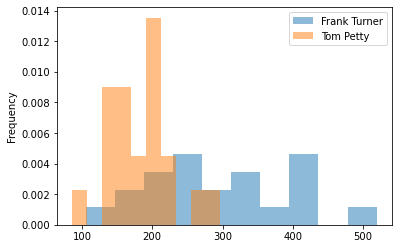

In [259]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Tom Petty'] * len(tp_lengths) + ['Frank Turner']*len(ft_lengths),
    "length" : np.concatenate((tp_song_length['length'],ft_song_length['length']))})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)